### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Preprecessing

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range= 0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [4]:
training_set=train_datagen.flow_from_directory("dataset_b/traning_set",
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 2848 images belonging to 2 classes.


In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
test_set=test_datagen.flow_from_directory("dataset_b/testing_set",
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 228 images belonging to 2 classes.


###  Adding layers

In [7]:
from keras import regularizers
regv = 0.0001

In [8]:
cnn=tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],kernel_regularizer=regularizers.l2(regv)))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',kernel_regularizer=regularizers.l2(regv)))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',kernel_regularizer=regularizers.l2(regv)))

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu',kernel_regularizer=regularizers.l2(regv)))

In [16]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(regv)))

In [17]:
cnn.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
trained=cnn.fit(x=training_set,validation_data=test_set,epochs=5)

Epoch 1/5
89/89 [==============================] - 75s 825ms/step - loss: 0.7083 - accuracy: 0.5741 - val_loss: 0.6980 - val_accuracy: 0.6667
Epoch 2/5
89/89 [==============================] - 28s 314ms/step - loss: 0.6686 - accuracy: 0.6404 - val_loss: 0.6547 - val_accuracy: 0.7018
Epoch 3/5
89/89 [==============================] - 29s 323ms/step - loss: 0.6433 - accuracy: 0.6643 - val_loss: 0.6408 - val_accuracy: 0.7149
Epoch 4/5
89/89 [==============================] - 35s 392ms/step - loss: 0.6328 - accuracy: 0.6713 - val_loss: 0.6353 - val_accuracy: 0.6842
Epoch 5/5
89/89 [==============================] - 38s 430ms/step - loss: 0.6016 - accuracy: 0.6963 - val_loss: 0.6173 - val_accuracy: 0.7237


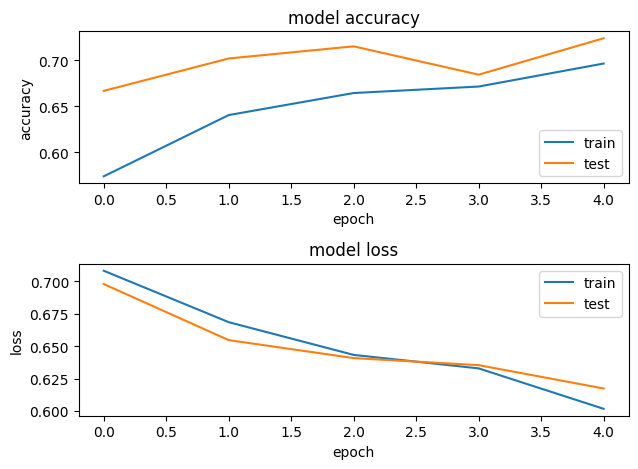

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')

plt.subplot(2,1,2)
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')

plt.tight_layout()

### Predictions

In [21]:
from keras.preprocessing import image
from keras.utils import load_img
from keras.utils import img_to_array

In [23]:
test_image=load_img('fire.jpg',target_size=(64,64))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
print(result)
training_set.class_indices


1/1 [==============================] - 0s 188ms/step
[[0.]]


{'fire': 0, 'non_fire': 1}

In [24]:
if result < 0.5:
    prediction='fire'
else:
    prediction='non fire'

In [25]:
print(prediction)

fire


In [26]:
test_image=load_img('non fire.jpg',target_size=(64,64))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
print(result)
training_set.class_indices

1/1 [==============================] - 0s 135ms/step
[[1.]]


{'fire': 0, 'non_fire': 1}

In [31]:
if result < 0.5:
    prediction='fire'
else:
    prediction='non fire'

In [32]:
print(prediction)

non fire
